In [8]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob

ModuleNotFoundError: No module named 'textblob'

In [1]:
pip install wordcloud

     |████████████████████████████████| 366 kB 23.5 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [9]:
amz_reviews = pd.read_csv("https://testejoseluiscarrillo.s3.amazonaws.com/1429_1.csv")


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (1,10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:

amz_reviews.shape


(34660, 21)

In [11]:


amz_reviews.columns


Index(['id', 'name', 'asins', 'brand', 'categories', 'keys', 'manufacturer',
       'reviews.date', 'reviews.dateAdded', 'reviews.dateSeen',
       'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.userCity',
       'reviews.userProvince', 'reviews.username'],
      dtype='object')

In [12]:
columns = ['id','name','keys','manufacturer','reviews.dateAdded', 'reviews.date','reviews.didPurchase',
          'reviews.userCity', 'reviews.userProvince', 'reviews.dateSeen', 'reviews.doRecommend','asins',
          'reviews.id', 'reviews.numHelpful', 'reviews.sourceURLs', 'reviews.title']
  
df = pd.DataFrame(amz_reviews.drop(columns,axis=1,inplace=False))


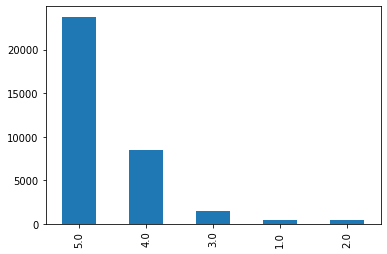

In [13]:
df['reviews.rating'].value_counts().plot(kind='bar')


##  Lowercasing
Before we move forward to calculate the sentiment scores for each review it is important to pre-process the textual data. Lowercasing helps in the process of normalization which is an important step to keep the words in a uniform manner (Welbers, et al., 2017, pp. 245-265).



In [14]:
## Change the reviews type to string
df['reviews.text'] = df['reviews.text'].astype(str)
 

In [15]:
## Before lowercasing 
df['reviews.text'][2]

'Inexpensive tablet for him to use and learn on, step up from the NABI. He was thrilled with it, learn how to Skype on it already...'

In [16]:
df['reviews.text'] = df['reviews.text'].apply(lambda x: " ".join(x.lower() for x in x.split()))


In [17]:
df['reviews.text'][2] ## to see the difference


'inexpensive tablet for him to use and learn on, step up from the nabi. he was thrilled with it, learn how to skype on it already...'

###  Special characters
Special characters are non-alphabetic and non-numeric values such as {!,@#$%^ *()~;:/<>\|+_-[]?}. Dealing with numbers is straightforward but special characters can be sometimes tricky. During tokenization, special characters create their own tokens and again not helpful for any algorithm, likewise, numbers.



In [18]:
df['reviews.text'] = df['reviews.text'].str.replace('[^\w\s]','')


In [19]:
df['reviews.text'][2]


'inexpensive tablet for him to use and learn on step up from the nabi he was thrilled with it learn how to skype on it already'

##  Stopwords
Stop-words being most commonly used in the English language; however, these words have no predictive power in reality. Words such as I, me, myself, he, she, they, our, mine, you, yours etc.



In [20]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ec2-user/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [21]:
stop = stopwords.words('english')

In [32]:
df['reviews.text'] = df['reviews.text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))


In [31]:
df['reviews.text'][2]

'inexpen tablet use learn step nabi thrill learn skype alreadi'

###  Stemming
Stemming algorithm is very useful in the field of text mining and helps to gain relevant information as it reduces all words with the same roots to a common form by removing suffixes such as -action, ing, -es and -ses. However, there can be problematic where there are spelling errors.



In [24]:
st = PorterStemmer()


In [30]:
df['reviews.text'] = df['reviews.text'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))


In [26]:
df['reviews.text'][2]

'inexpens tablet use learn step nabi thrill learn skype alreadi'

In [27]:

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

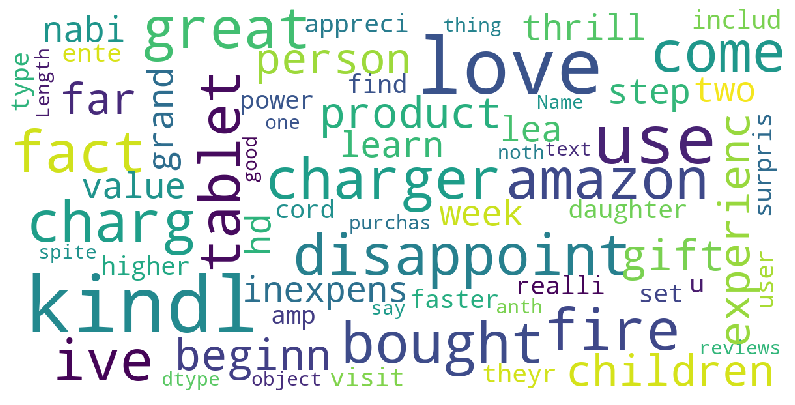

In [28]:
def show_wordcloud(col, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=500,
        max_font_size=40, 
        scale=3,
        random_state=1
    ).generate(str(col))

    fig = plt.figure(1, figsize=(14, 14))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()


if __name__ == '__main__':

    show_wordcloud(df['reviews.text']) 

In [29]:
def senti(x):
    return TextBlob(x).sentiment  
 
df['senti_score'] = df['reviews.text'].apply(senti)
 


NameError: name 'TextBlob' is not defined

In [ ]:
df.senti_score.head()

In [ ]:
df